<a href="https://colab.research.google.com/github/abhishek116002/dmml_assignments/blob/main/assignment3/asgmnt3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from packaging import version
import sklearn
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape, y_train.shape

((55000, 28, 28), (55000,))

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
flat_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28])
])
flat_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_flat = flat_model.predict(X_train)
X_test_flat = flat_model.predict(X_test)
X_valid_flat = flat_model.predict(X_valid)

157/157 [==============================] - 0s 2ms/step


In [ ]:
X_train_flat.shape, X_test_flat.shape, X_valid_flat.shape,

((55000, 784), (10000, 784), (5000, 784))

In [ ]:
params = [0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.90]
results = []
shapes = []
for i in range(len(params)):

  pca = PCA(n_components=params[i], svd_solver = 'full')
  pca.fit(X_train_flat)
  X_train_flat_pca = pca.transform(X_train_flat)
  X_valid_flat_pca = pca.transform(X_valid_flat)
  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
  log_reg.fit(X_train_flat_pca[:], y_train[:])
  result = log_reg.score(X_valid_flat_pca, y_valid)
  results.append(result )
  shapes.append(X_train_flat_pca.shape)



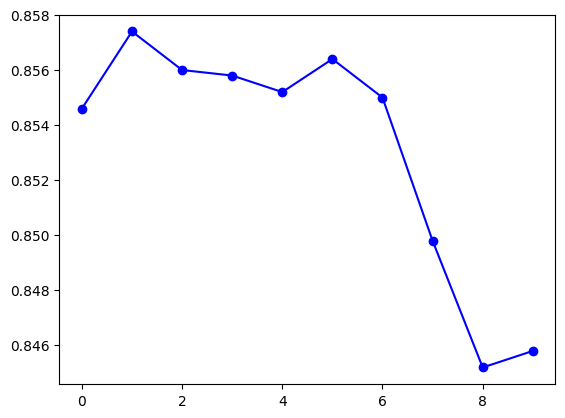

In [ ]:
plt.plot(results, 'bo-')

In [ ]:
#@title Will choose parameter n_components=0.94 as it reduces the number of features to 157, which is manageable!
results, shapes

([0.8546,
  0.8574,
  0.856,
  0.8558,
  0.8552,
  0.8564,
  0.855,
  0.8498,
  0.8452,
  0.8458],
 [(55000, 459),
  (55000, 349),
  (55000, 277),
  (55000, 226),
  (55000, 187),
  (55000, 157),
  (55000, 133),
  (55000, 113),
  (55000, 97),
  (55000, 84)])

In [ ]:
#@title Base Model


pca = PCA(n_components=0.94, svd_solver = 'full')
pca.fit(X_train_flat)
X_train_flat_pca = pca.transform(X_train_flat)
X_valid_flat_pca = pca.transform(X_valid_flat)
X_test_flat_pca = pca.transform(X_test_flat)
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_flat_pca[:], y_train[:])
log_reg.score(X_valid_flat_pca, y_valid)

0.8564

In [ ]:
#@title took 50 points at random and did logistic regression on those and looked at the accuracy of the resulting model

rep_idx = np.random.randint(0,55000,50)
X_representative_digits_pca = X_train_flat_pca[rep_idx]
y_representative_digits = y_train[rep_idx]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits_pca, y_representative_digits)
log_reg.score(X_valid_flat_pca, y_valid)

0.7

In [ ]:
#@title took 100 points using kmeans clustering and did logistic regression on those and looked at the accuracy of the resulting model

k = 100
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
X_digits_dist = kmeans.fit_transform(X_train_flat_pca)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

X_representative_digits_pca = X_train_flat_pca[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits_pca, y_representative_digits)
log_reg.score(X_valid_flat_pca, y_valid)

0.7428

did parameter tuning to find the best value of k(number of clusters) in the KMeans function. The values of k considered are approximatly 1%, 2%, 3% and 3.5% of the data.

500 0.7822---1000 0.8062---1500 0.8164---2000 0.8128---

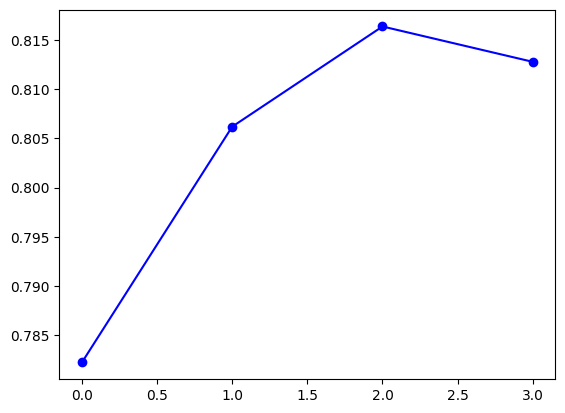

In [ ]:


params = [500, 1000, 1500, 2000 ]
results = []
for i in range(len(params)):
  k = params[i]

  kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
  X_digits_dist = kmeans.fit_transform(X_train_flat_pca)
  representative_digit_idx = np.argmin(X_digits_dist, axis=0)

  X_representative_digits_pca = X_train_flat_pca[representative_digit_idx]
  y_representative_digits = y_train[representative_digit_idx]

  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
  log_reg.fit(X_representative_digits_pca, y_representative_digits)
  results.append(log_reg.score(X_valid_flat_pca, y_valid))
  print(k, results[i], end = '---')

plt.plot(results, 'bo-')


chose k=1500 clusters after doing parameter tuning. Used the 1 point each closest to each cluster. Used the resulting 1500 points to train the logistic regression model.  

In [ ]:
k = 1500
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
X_digits_dist = kmeans.fit_transform(X_train_flat_pca)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

X_representative_digits_pca = X_train_flat_pca[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits_pca, y_representative_digits)
log_reg.score(X_test_flat_pca, y_test)

0.8046

Gave ALL points in a cluster the label of the point closest to the centroid of that cluster. Then used the propagated y values to train a logistic regression.

In [ ]:
y_train_propagated = np.empty(len(X_train_flat_pca), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_flat_pca, y_train_propagated)
log_reg.score(X_test_flat_pca, y_test)

0.8101

tried to propagate the y labels only to percentile% of the points in each cluster(chosen by their distance from centroid of cluster, less distance more preferred). Then used the points that have propagated labels to train a logistic regression.
tried different values of percentile.

10 0.8102----20 0.8126----30 0.814----40 0.8164----50 0.8188----60 0.8176----70 0.8206----80 0.82----90 0.8242----100 0.8218----

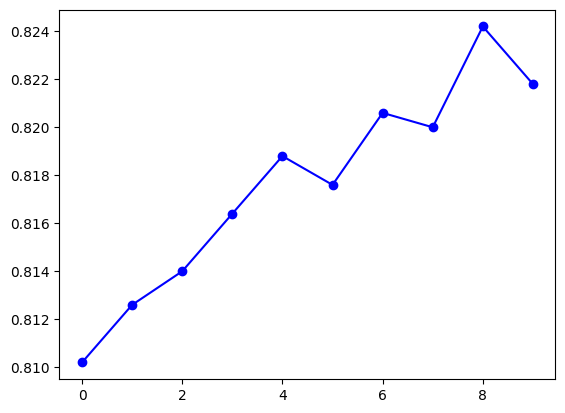

In [ ]:
percentiles = list(range(10,101,10))
results1 = []
for i in range(len(percentiles)):
  percentile = percentiles[i]
  X_cluster_dist = X_digits_dist[:,0]
  n = len(X_cluster_dist)
  for i in range(n):
    X_cluster_dist[i] = X_digits_dist[i, kmeans.labels_[i]]



  for i in range(k):
      in_cluster = (kmeans.labels_ == i)
      cluster_dist = X_cluster_dist[in_cluster]
      cutoff_distance = np.percentile(cluster_dist, percentile)
      above_cutoff = (X_cluster_dist > cutoff_distance)
      X_cluster_dist[in_cluster & above_cutoff] = -1

  partially_propagated = (X_cluster_dist != -1)
  X_train_flat_pca_partially_propagated = X_train_flat_pca[partially_propagated]
  y_train_partially_propagated = y_train_propagated[partially_propagated]

  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
  log_reg.fit(X_train_flat_pca_partially_propagated, y_train_partially_propagated)
  result = log_reg.score(X_valid_flat_pca, y_valid)
  results1.append(result)
  print(percentile, result, end = '----')

plt.plot(results1, 'bo-')


chose percentile=30 by parameter tuning in previous code block.

In [ ]:
percentile = 30
X_cluster_dist = X_digits_dist[:,0]
n = len(X_cluster_dist)
for i in range(n):
  X_cluster_dist[i] = X_digits_dist[i, kmeans.labels_[i]]



for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_flat_pca_partially_propagated = X_train_flat_pca[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_flat_pca_partially_propagated, y_train_partially_propagated)
result = log_reg.score(X_test_flat_pca, y_test)
result

0.8064